### 1. Imports

In [4]:
import pandas as pd
import os

In [1]:
from sdv.metadata import Metadata
from sdv.sampling import Condition

from sdv.single_table import GaussianCopulaSynthesizer
from sdv.single_table import CTGANSynthesizer
from sdv.single_table import TVAESynthesizer
from sdv.single_table import CopulaGANSynthesizer

In [2]:
NUM_ROWS = 50
NUM_EPOCHS = 5_000
NUM_STOP = 1_100
NUM_STEPS = 100

#### 4.1. GaussianCopulaSynthesizer

In [3]:
list(range(0, NUM_STOP, NUM_STEPS))

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [9]:
for i in range(10):
    print(f'Generating synthetic data for set {i}')
    df = pd.read_csv(f'../../data/train/set_{i}.csv')
    metadata = Metadata()
    metadata.detect_table_from_dataframe(data=df, table_name='TLP')
    categorical_columns = [
        'ED_2Clases', 'clin-frecUsoEmail'
    ]
    metadata.update_columns(
        column_names=categorical_columns,
        sdtype='categorical',
        table_name='TLP'
    )
    metadata.validate()

    num_d, num_h = df['ED_2Clases'].value_counts()
    class_difference = num_d - num_h
    print(f'class difference: {class_difference}')
    for sync_data in range(0, NUM_STOP, NUM_STEPS):
        print(f'Generating synthetic data for set {i} with {sync_data} samples')
        if sync_data == 0:
            conditions = []
        else:
            class_d = Condition(
                num_rows=int(sync_data/2),
                column_values={'ED_2Clases': 'D'}
            )
            class_h = Condition(
                num_rows=int(sync_data/2) + class_difference,
                column_values={'ED_2Clases': 'H'}
            )
            conditions = [class_d, class_h]
        gc_synthesizer = GaussianCopulaSynthesizer(
            metadata,
            enforce_min_max_values=True,
            enforce_rounding=True,
            locales=["es_ES"],
            numerical_distributions={},
            default_distribution='beta'
        )
        gc_synthesizer.auto_assign_transformers(df)
        processed_df = gc_synthesizer.preprocess(df)
        gc_synthesizer.fit_processed_data(processed_df)
        gc_synthetic_data = gc_synthesizer.sample_from_conditions(
            conditions=conditions,
            batch_size = 50,
            max_tries_per_batch = 100
        )
        gc_synthetic_data = pd.concat([df, gc_synthetic_data], ignore_index=True)
        gc_synthetic_data.to_csv(
            f'../../data/synthetic/gc/oversampling/set_{i}_over_{sync_data}.csv',
            index=False
        )
        print(f'Original data shape: {df.shape}. Shynthetic data shape: {gc_synthetic_data.shape}')

Generating synthetic data for set 0
class difference: 75
Generating synthetic data for set 0 with 0 samples


c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Sampling conditions: : 0it [00:00, ?it/s]


Original data shape: (159, 113). Shynthetic data shape: (159, 113)
Generating synthetic data for set 0 with 100 samples


Sampling conditions: : 200it [00:01, 104.89it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (334, 113)
Generating synthetic data for set 0 with 200 samples


Sampling conditions: : 300it [00:02, 106.04it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (434, 113)
Generating synthetic data for set 0 with 300 samples


Sampling conditions: : 400it [00:03, 101.88it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (534, 113)
Generating synthetic data for set 0 with 400 samples


Sampling conditions: : 500it [00:04, 108.61it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (634, 113)
Generating synthetic data for set 0 with 500 samples


Sampling conditions: : 600it [00:05, 110.00it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (734, 113)
Generating synthetic data for set 0 with 600 samples


Sampling conditions: : 700it [00:06, 109.75it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (834, 113)
Generating synthetic data for set 0 with 700 samples


Sampling conditions: : 800it [00:07, 110.68it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (934, 113)
Generating synthetic data for set 0 with 800 samples


Sampling conditions: : 900it [00:08, 110.90it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (1034, 113)
Generating synthetic data for set 0 with 900 samples


Sampling conditions: : 1000it [00:09, 109.35it/s]                      


Original data shape: (159, 113). Shynthetic data shape: (1134, 113)
Generating synthetic data for set 0 with 1000 samples


Sampling conditions: : 1100it [00:09, 110.76it/s]                        
c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Original data shape: (159, 113). Shynthetic data shape: (1234, 113)
Generating synthetic data for set 1
class difference: 75
Generating synthetic data for set 1 with 0 samples


Sampling conditions: : 0it [00:00, ?it/s]


Original data shape: (159, 113). Shynthetic data shape: (159, 113)
Generating synthetic data for set 1 with 100 samples


Sampling conditions: : 200it [00:01, 104.50it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (334, 113)
Generating synthetic data for set 1 with 200 samples


Sampling conditions: : 300it [00:02, 106.78it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (434, 113)
Generating synthetic data for set 1 with 300 samples


Sampling conditions: : 400it [00:03, 108.32it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (534, 113)
Generating synthetic data for set 1 with 400 samples


Sampling conditions: : 500it [00:04, 109.69it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (634, 113)
Generating synthetic data for set 1 with 500 samples


Sampling conditions: : 600it [00:05, 108.51it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (734, 113)
Generating synthetic data for set 1 with 600 samples


Sampling conditions: : 700it [00:06, 110.48it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (834, 113)
Generating synthetic data for set 1 with 700 samples


Sampling conditions: : 800it [00:07, 110.36it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (934, 113)
Generating synthetic data for set 1 with 800 samples


Sampling conditions: : 900it [00:08, 109.14it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (1034, 113)
Generating synthetic data for set 1 with 900 samples


Sampling conditions: : 1000it [00:09, 109.99it/s]                      


Original data shape: (159, 113). Shynthetic data shape: (1134, 113)
Generating synthetic data for set 1 with 1000 samples


Sampling conditions: : 1100it [00:09, 110.94it/s]                        
c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Original data shape: (159, 113). Shynthetic data shape: (1234, 113)
Generating synthetic data for set 2
class difference: 75
Generating synthetic data for set 2 with 0 samples


Sampling conditions: : 0it [00:00, ?it/s]


Original data shape: (159, 113). Shynthetic data shape: (159, 113)
Generating synthetic data for set 2 with 100 samples


Sampling conditions: : 200it [00:01, 105.23it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (334, 113)
Generating synthetic data for set 2 with 200 samples


Sampling conditions: : 300it [00:02, 108.71it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (434, 113)
Generating synthetic data for set 2 with 300 samples


Sampling conditions: : 400it [00:03, 107.54it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (534, 113)
Generating synthetic data for set 2 with 400 samples


Sampling conditions: : 500it [00:04, 109.74it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (634, 113)
Generating synthetic data for set 2 with 500 samples


Sampling conditions: : 600it [00:05, 108.91it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (734, 113)
Generating synthetic data for set 2 with 600 samples


Sampling conditions: : 700it [00:06, 108.06it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (834, 113)
Generating synthetic data for set 2 with 700 samples


Sampling conditions: : 800it [00:07, 101.03it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (934, 113)
Generating synthetic data for set 2 with 800 samples


Sampling conditions: : 900it [00:09, 95.90it/s]                        


Original data shape: (159, 113). Shynthetic data shape: (1034, 113)
Generating synthetic data for set 2 with 900 samples


Sampling conditions: : 1000it [00:09, 109.68it/s]                      


Original data shape: (159, 113). Shynthetic data shape: (1134, 113)
Generating synthetic data for set 2 with 1000 samples


Sampling conditions: : 1100it [00:09, 110.91it/s]                        
c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Original data shape: (159, 113). Shynthetic data shape: (1234, 113)
Generating synthetic data for set 3
class difference: 75
Generating synthetic data for set 3 with 0 samples


Sampling conditions: : 0it [00:00, ?it/s]


Original data shape: (159, 113). Shynthetic data shape: (159, 113)
Generating synthetic data for set 3 with 100 samples


Sampling conditions: : 200it [00:01, 105.55it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (334, 113)
Generating synthetic data for set 3 with 200 samples


Sampling conditions: : 300it [00:02, 103.58it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (434, 113)
Generating synthetic data for set 3 with 300 samples


Sampling conditions: : 400it [00:03, 106.24it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (534, 113)
Generating synthetic data for set 3 with 400 samples


Sampling conditions: : 500it [00:04, 109.07it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (634, 113)
Generating synthetic data for set 3 with 500 samples


Sampling conditions: : 600it [00:05, 109.73it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (734, 113)
Generating synthetic data for set 3 with 600 samples


Sampling conditions: : 700it [00:06, 110.53it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (834, 113)
Generating synthetic data for set 3 with 700 samples


Sampling conditions: : 800it [00:07, 110.04it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (934, 113)
Generating synthetic data for set 3 with 800 samples


Sampling conditions: : 900it [00:08, 108.91it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (1034, 113)
Generating synthetic data for set 3 with 900 samples


Sampling conditions: : 1000it [00:09, 107.47it/s]                      


Original data shape: (159, 113). Shynthetic data shape: (1134, 113)
Generating synthetic data for set 3 with 1000 samples


Sampling conditions: : 1100it [00:10, 109.96it/s]                        
c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Original data shape: (159, 113). Shynthetic data shape: (1234, 113)
Generating synthetic data for set 4
class difference: 75
Generating synthetic data for set 4 with 0 samples


Sampling conditions: : 0it [00:00, ?it/s]


Original data shape: (159, 113). Shynthetic data shape: (159, 113)
Generating synthetic data for set 4 with 100 samples


Sampling conditions: : 200it [00:01, 104.05it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (334, 113)
Generating synthetic data for set 4 with 200 samples


Sampling conditions: : 300it [00:02, 106.97it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (434, 113)
Generating synthetic data for set 4 with 300 samples


Sampling conditions: : 400it [00:03, 108.13it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (534, 113)
Generating synthetic data for set 4 with 400 samples


Sampling conditions: : 500it [00:04, 107.56it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (634, 113)
Generating synthetic data for set 4 with 500 samples


Sampling conditions: : 600it [00:05, 109.10it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (734, 113)
Generating synthetic data for set 4 with 600 samples


Sampling conditions: : 700it [00:06, 109.39it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (834, 113)
Generating synthetic data for set 4 with 700 samples


Sampling conditions: : 800it [00:07, 107.81it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (934, 113)
Generating synthetic data for set 4 with 800 samples


Sampling conditions: : 900it [00:08, 107.33it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (1034, 113)
Generating synthetic data for set 4 with 900 samples


Sampling conditions: : 1000it [00:09, 109.55it/s]                      


Original data shape: (159, 113). Shynthetic data shape: (1134, 113)
Generating synthetic data for set 4 with 1000 samples


Sampling conditions: : 1100it [00:10, 104.19it/s]                        
c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Original data shape: (159, 113). Shynthetic data shape: (1234, 113)
Generating synthetic data for set 5
class difference: 75
Generating synthetic data for set 5 with 0 samples


Sampling conditions: : 0it [00:00, ?it/s]


Original data shape: (159, 113). Shynthetic data shape: (159, 113)
Generating synthetic data for set 5 with 100 samples


Sampling conditions: : 200it [00:01, 103.59it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (334, 113)
Generating synthetic data for set 5 with 200 samples


Sampling conditions: : 300it [00:02, 101.89it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (434, 113)
Generating synthetic data for set 5 with 300 samples


Sampling conditions: : 400it [00:03, 107.66it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (534, 113)
Generating synthetic data for set 5 with 400 samples


Sampling conditions: : 500it [00:04, 107.09it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (634, 113)
Generating synthetic data for set 5 with 500 samples


Sampling conditions: : 600it [00:05, 105.14it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (734, 113)
Generating synthetic data for set 5 with 600 samples


Sampling conditions: : 700it [00:06, 108.64it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (834, 113)
Generating synthetic data for set 5 with 700 samples


Sampling conditions: : 800it [00:07, 107.57it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (934, 113)
Generating synthetic data for set 5 with 800 samples


Sampling conditions: : 900it [00:08, 106.83it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (1034, 113)
Generating synthetic data for set 5 with 900 samples


Sampling conditions: : 1000it [00:09, 108.41it/s]                      


Original data shape: (159, 113). Shynthetic data shape: (1134, 113)
Generating synthetic data for set 5 with 1000 samples


Sampling conditions: : 1100it [00:10, 107.22it/s]                        
c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Original data shape: (159, 113). Shynthetic data shape: (1234, 113)
Generating synthetic data for set 6
class difference: 75
Generating synthetic data for set 6 with 0 samples


Sampling conditions: : 0it [00:00, ?it/s]


Original data shape: (159, 113). Shynthetic data shape: (159, 113)
Generating synthetic data for set 6 with 100 samples


Sampling conditions: : 200it [00:01, 103.63it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (334, 113)
Generating synthetic data for set 6 with 200 samples


Sampling conditions: : 300it [00:02, 103.76it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (434, 113)
Generating synthetic data for set 6 with 300 samples


Sampling conditions: : 400it [00:03, 107.83it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (534, 113)
Generating synthetic data for set 6 with 400 samples


Sampling conditions: : 500it [00:05, 99.47it/s]                        


Original data shape: (159, 113). Shynthetic data shape: (634, 113)
Generating synthetic data for set 6 with 500 samples


Sampling conditions: : 600it [00:05, 106.77it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (734, 113)
Generating synthetic data for set 6 with 600 samples


Sampling conditions: : 700it [00:06, 101.56it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (834, 113)
Generating synthetic data for set 6 with 700 samples


Sampling conditions: : 800it [00:07, 107.58it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (934, 113)
Generating synthetic data for set 6 with 800 samples


Sampling conditions: : 900it [00:08, 110.85it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (1034, 113)
Generating synthetic data for set 6 with 900 samples


Sampling conditions: : 1000it [00:09, 109.54it/s]                      


Original data shape: (159, 113). Shynthetic data shape: (1134, 113)
Generating synthetic data for set 6 with 1000 samples


Sampling conditions: : 1100it [00:09, 110.78it/s]                        
c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Original data shape: (159, 113). Shynthetic data shape: (1234, 113)
Generating synthetic data for set 7
class difference: 75
Generating synthetic data for set 7 with 0 samples


Sampling conditions: : 0it [00:00, ?it/s]


Original data shape: (159, 113). Shynthetic data shape: (159, 113)
Generating synthetic data for set 7 with 100 samples


Sampling conditions: : 200it [00:01, 103.87it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (334, 113)
Generating synthetic data for set 7 with 200 samples


Sampling conditions: : 300it [00:02, 107.38it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (434, 113)
Generating synthetic data for set 7 with 300 samples


Sampling conditions: : 400it [00:03, 108.71it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (534, 113)
Generating synthetic data for set 7 with 400 samples


Sampling conditions: : 500it [00:04, 108.53it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (634, 113)
Generating synthetic data for set 7 with 500 samples


Sampling conditions: : 600it [00:05, 106.89it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (734, 113)
Generating synthetic data for set 7 with 600 samples


Sampling conditions: : 700it [00:06, 106.58it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (834, 113)
Generating synthetic data for set 7 with 700 samples


Sampling conditions: : 800it [00:07, 108.28it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (934, 113)
Generating synthetic data for set 7 with 800 samples


Sampling conditions: : 900it [00:08, 109.64it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (1034, 113)
Generating synthetic data for set 7 with 900 samples


Sampling conditions: : 1000it [00:09, 109.38it/s]                      


Original data shape: (159, 113). Shynthetic data shape: (1134, 113)
Generating synthetic data for set 7 with 1000 samples


Sampling conditions: : 1100it [00:10, 107.78it/s]                        
c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Original data shape: (159, 113). Shynthetic data shape: (1234, 113)
Generating synthetic data for set 8
class difference: 75
Generating synthetic data for set 8 with 0 samples


Sampling conditions: : 0it [00:00, ?it/s]


Original data shape: (159, 113). Shynthetic data shape: (159, 113)
Generating synthetic data for set 8 with 100 samples


Sampling conditions: : 200it [00:01, 103.11it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (334, 113)
Generating synthetic data for set 8 with 200 samples


Sampling conditions: : 300it [00:03, 98.65it/s]                        


Original data shape: (159, 113). Shynthetic data shape: (434, 113)
Generating synthetic data for set 8 with 300 samples


Sampling conditions: : 400it [00:04, 98.34it/s]                        


Original data shape: (159, 113). Shynthetic data shape: (534, 113)
Generating synthetic data for set 8 with 400 samples


Sampling conditions: : 500it [00:04, 105.99it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (634, 113)
Generating synthetic data for set 8 with 500 samples


Sampling conditions: : 600it [00:05, 106.96it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (734, 113)
Generating synthetic data for set 8 with 600 samples


Sampling conditions: : 700it [00:06, 110.23it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (834, 113)
Generating synthetic data for set 8 with 700 samples


Sampling conditions: : 800it [00:07, 107.71it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (934, 113)
Generating synthetic data for set 8 with 800 samples


Sampling conditions: : 900it [00:08, 108.70it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (1034, 113)
Generating synthetic data for set 8 with 900 samples


Sampling conditions: : 1000it [00:09, 106.52it/s]                      


Original data shape: (159, 113). Shynthetic data shape: (1134, 113)
Generating synthetic data for set 8 with 1000 samples


Sampling conditions: : 1100it [00:09, 110.55it/s]                        
c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Original data shape: (159, 113). Shynthetic data shape: (1234, 113)
Generating synthetic data for set 9
class difference: 75
Generating synthetic data for set 9 with 0 samples


Sampling conditions: : 0it [00:00, ?it/s]


Original data shape: (159, 113). Shynthetic data shape: (159, 113)
Generating synthetic data for set 9 with 100 samples


Sampling conditions: : 200it [00:01, 103.37it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (334, 113)
Generating synthetic data for set 9 with 200 samples


Sampling conditions: : 300it [00:02, 102.76it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (434, 113)
Generating synthetic data for set 9 with 300 samples


Sampling conditions: : 400it [00:03, 106.39it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (534, 113)
Generating synthetic data for set 9 with 400 samples


Sampling conditions: : 500it [00:04, 109.12it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (634, 113)
Generating synthetic data for set 9 with 500 samples


Sampling conditions: : 600it [00:05, 104.22it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (734, 113)
Generating synthetic data for set 9 with 600 samples


Sampling conditions: : 700it [00:06, 105.55it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (834, 113)
Generating synthetic data for set 9 with 700 samples


Sampling conditions: : 800it [00:07, 108.12it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (934, 113)
Generating synthetic data for set 9 with 800 samples


Sampling conditions: : 900it [00:08, 105.46it/s]                       


Original data shape: (159, 113). Shynthetic data shape: (1034, 113)
Generating synthetic data for set 9 with 900 samples


Sampling conditions: : 1000it [00:09, 108.18it/s]                      


Original data shape: (159, 113). Shynthetic data shape: (1134, 113)
Generating synthetic data for set 9 with 1000 samples


Sampling conditions: : 1100it [00:09, 112.02it/s]                        

Original data shape: (159, 113). Shynthetic data shape: (1234, 113)


#### 4.3. TVAESynthesizer

In [5]:
for i in range(10):
    print(f'Generating synthetic data for set {i}')
    df = pd.read_csv(f'../../data/train/set_{i}.csv')
    metadata = Metadata()
    metadata.detect_table_from_dataframe(data=df, table_name='TLP')
    categorical_columns = [
        'ED_2Clases', 'clin-frecUsoEmail'
    ]
    metadata.update_columns(
        column_names=categorical_columns,
        sdtype='categorical',
        table_name='TLP'
    )
    metadata.validate()

    num_d, num_h = df['ED_2Clases'].value_counts()
    class_difference = num_d - num_h
    print(f'class difference: {class_difference}')
    for sync_data in range(0, NUM_STOP, NUM_STEPS):
        print(f'Generating synthetic data for set {i} with {sync_data} samples')
        if sync_data == 0:
            conditions = []
        else:
            class_d = Condition(
                num_rows=int(sync_data/2),
                column_values={'ED_2Clases': 'D'}
            )
            class_h = Condition(
                num_rows=int(sync_data/2) + class_difference,
                column_values={'ED_2Clases': 'H'}
            )
            conditions = [class_d, class_h]
        tvaes_synthesizer = TVAESynthesizer(
            metadata,
            enforce_min_max_values=True,
            enforce_rounding=True,
            epochs=NUM_EPOCHS,
            verbose=True,
            cuda=True
        )
        tvaes_synthesizer.auto_assign_transformers(df)
        processed_df = tvaes_synthesizer.preprocess(df)
        tvaes_synthesizer.fit_processed_data(processed_df)
        tvaes_synthetic_data = tvaes_synthesizer.sample_from_conditions(
            conditions=conditions,
            batch_size = 50,
            max_tries_per_batch = 100
        )
        tvaes_synthetic_data = pd.concat([df, tvaes_synthetic_data], ignore_index=True)
        tvaes_synthetic_data.to_csv(
            f'../../data/synthetic/gc/oversampling/set_{i}_over_{sync_data}.csv',
            index=False
        )
        print(f'Original data shape: {df.shape}. Shynthetic data shape: {tvaes_synthetic_data.shape}')

Generating synthetic data for set 0
class difference: 75
Generating synthetic data for set 0 with 0 samples


c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Loss: -277.605: 100%|██████████| 5000/5000 [04:10<00:00, 19.96it/s]
Sampling conditions: : 0it [00:00, ?it/s]


Original data shape: (159, 113). Shynthetic data shape: (159, 113)
Generating synthetic data for set 0 with 100 samples


Loss: -280.826: 100%|██████████| 5000/5000 [04:07<00:00, 20.21it/s]
Sampling conditions: : 200it [00:04, 48.76it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 200it [00:04, 43.24it/s]


Original data shape: (159, 113). Shynthetic data shape: (334, 113)
Generating synthetic data for set 0 with 200 samples


Sampling conditions:  36%|███▌      | 98/275 [00:01<00:03, 50.18it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 300it [00:05, 58.72it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CON

Original data shape: (159, 113). Shynthetic data shape: (434, 113)
Generating synthetic data for set 0 with 300 samples


Sampling conditions:  39%|███▉      | 148/375 [00:03<00:05, 44.09it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 400it [00:09, 50.80it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (534, 113)
Generating synthetic data for set 0 with 400 samples


Sampling conditions:  42%|████▏     | 200/475 [00:04<00:07, 36.31it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 497it [00:11, 50.51it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (634, 113)
Generating synthetic data for set 0 with 500 samples


Sampling conditions:  43%|████▎     | 250/575 [00:05<00:08, 37.39it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 600it [00:14, 27.74it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (734, 113)
Generating synthetic data for set 0 with 600 samples


Sampling conditions:  44%|████▍     | 300/675 [00:06<00:08, 41.94it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 700it [00:16, 42.71it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (834, 113)
Generating synthetic data for set 0 with 700 samples


Sampling conditions:  45%|████▌     | 349/775 [00:07<00:10, 42.14it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 800it [00:17, 59.97it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (934, 113)
Generating synthetic data for set 0 with 800 samples


Sampling conditions:  46%|████▌     | 400/875 [00:09<00:11, 42.18it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 900it [00:21, 39.03it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (1034, 113)
Generating synthetic data for set 0 with 900 samples


Sampling conditions:  46%|████▌     | 449/975 [00:09<00:11, 46.08it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 999it [00:24, 34.95it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (1134, 113)
Generating synthetic data for set 0 with 1000 samples


Sampling conditions:  47%|████▋     | 500/1075 [00:10<00:13, 41.35it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 1100it [00:25, 50.69it/s]                        c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe

Original data shape: (159, 113). Shynthetic data shape: (1234, 113)
Generating synthetic data for set 1
class difference: 75
Generating synthetic data for set 1 with 0 samples


Loss: -272.494: 100%|██████████| 5000/5000 [04:01<00:00, 20.71it/s]
Sampling conditions: : 0it [00:00, ?it/s]


Original data shape: (159, 113). Shynthetic data shape: (159, 113)
Generating synthetic data for set 1 with 100 samples


Sampling conditions:  29%|██▊       | 50/175 [00:00<00:02, 51.27it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 200it [00:04, 48.89it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CON

Original data shape: (159, 113). Shynthetic data shape: (334, 113)
Generating synthetic data for set 1 with 200 samples


Sampling conditions:  36%|███▋      | 100/275 [00:01<00:03, 53.21it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 300it [00:05, 61.19it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (434, 113)
Generating synthetic data for set 1 with 300 samples


Sampling conditions:  39%|███▉      | 148/375 [00:02<00:04, 48.40it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 400it [00:10, 27.06it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (534, 113)
Generating synthetic data for set 1 with 400 samples


Loss: -284.650: 100%|██████████| 5000/5000 [04:08<00:00, 20.09it/s]
Sampling conditions: : 500it [00:12, 50.99it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 500it [00:12, 41.11it/s]


Original data shape: (159, 113). Shynthetic data shape: (634, 113)
Generating synthetic data for set 1 with 500 samples


Sampling conditions:  43%|████▎     | 249/575 [00:06<00:10, 32.28it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 600it [00:17, 46.27it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (734, 113)
Generating synthetic data for set 1 with 600 samples


Sampling conditions:  44%|████▍     | 298/675 [00:06<00:08, 45.13it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 700it [00:17, 49.90it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (834, 113)
Generating synthetic data for set 1 with 700 samples


Sampling conditions:  45%|████▌     | 349/775 [00:08<00:12, 32.89it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 800it [00:20, 49.20it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (934, 113)
Generating synthetic data for set 1 with 800 samples


Sampling conditions:  46%|████▌     | 400/875 [00:07<00:10, 44.53it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 900it [00:19, 39.22it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (1034, 113)
Generating synthetic data for set 1 with 900 samples


Sampling conditions:  46%|████▌     | 449/975 [00:09<00:10, 48.26it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 1000it [00:24, 28.32it/s]                      c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (1134, 113)
Generating synthetic data for set 1 with 1000 samples


Sampling conditions:  46%|████▌     | 495/1075 [00:08<00:08, 64.82it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 1100it [00:24, 33.42it/s]                        c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe

Original data shape: (159, 113). Shynthetic data shape: (1234, 113)
Generating synthetic data for set 2
class difference: 75
Generating synthetic data for set 2 with 0 samples


Loss: -294.390: 100%|██████████| 5000/5000 [04:03<00:00, 20.58it/s]
Sampling conditions: : 0it [00:00, ?it/s]


Original data shape: (159, 113). Shynthetic data shape: (159, 113)
Generating synthetic data for set 2 with 100 samples


Sampling conditions:  29%|██▊       | 50/175 [00:00<00:02, 48.84it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 196it [00:04, 41.79it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CON

Original data shape: (159, 113). Shynthetic data shape: (334, 113)
Generating synthetic data for set 2 with 200 samples


Sampling conditions:  36%|███▋      | 100/275 [00:01<00:03, 52.66it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 300it [00:06, 39.79it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (434, 113)
Generating synthetic data for set 2 with 300 samples


Sampling conditions:  40%|████      | 150/375 [00:03<00:07, 30.11it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 398it [00:09, 46.56it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (534, 113)
Generating synthetic data for set 2 with 400 samples


Sampling conditions:  42%|████▏     | 200/475 [00:04<00:07, 37.13it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 500it [00:11, 55.53it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (634, 113)
Generating synthetic data for set 2 with 500 samples


Sampling conditions:  43%|████▎     | 249/575 [00:06<00:07, 42.15it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 600it [00:14, 55.94it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (734, 113)
Generating synthetic data for set 2 with 600 samples


Sampling conditions:  44%|████▍     | 299/675 [00:05<00:07, 50.69it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 697it [00:15, 44.85it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (834, 113)
Generating synthetic data for set 2 with 700 samples


Sampling conditions:  45%|████▌     | 350/775 [00:07<00:09, 46.61it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 800it [00:18, 42.14it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (934, 113)
Generating synthetic data for set 2 with 800 samples


Sampling conditions:  46%|████▌     | 400/875 [00:07<00:09, 50.70it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 898it [00:18, 51.38it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (1034, 113)
Generating synthetic data for set 2 with 900 samples


Sampling conditions:  46%|████▌     | 450/975 [00:09<00:13, 39.46it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 1000it [00:23, 30.80it/s]                      c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (1134, 113)
Generating synthetic data for set 2 with 1000 samples


Sampling conditions:  47%|████▋     | 500/1075 [00:10<00:18, 30.29it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 1095it [00:25, 48.74it/s]                        c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe

Original data shape: (159, 113). Shynthetic data shape: (1234, 113)
Generating synthetic data for set 3
class difference: 75
Generating synthetic data for set 3 with 0 samples


Loss: -275.668: 100%|██████████| 5000/5000 [04:00<00:00, 20.78it/s]
Sampling conditions: : 0it [00:00, ?it/s]


Original data shape: (159, 113). Shynthetic data shape: (159, 113)
Generating synthetic data for set 3 with 100 samples


Loss: -276.022: 100%|██████████| 5000/5000 [04:01<00:00, 20.67it/s]
Sampling conditions: : 199it [00:05, 44.06it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 200it [00:06, 28.86it/s]


Original data shape: (159, 113). Shynthetic data shape: (334, 113)
Generating synthetic data for set 3 with 200 samples


Sampling conditions:  36%|███▋      | 100/275 [00:02<00:05, 31.01it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 300it [00:07, 36.87it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (434, 113)
Generating synthetic data for set 3 with 300 samples


Sampling conditions:  40%|████      | 150/375 [00:03<00:05, 38.42it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 400it [00:08, 51.74it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (534, 113)
Generating synthetic data for set 3 with 400 samples


Sampling conditions:  42%|████▏     | 198/475 [00:05<00:08, 33.64it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 500it [00:13, 45.75it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (634, 113)
Generating synthetic data for set 3 with 500 samples


Sampling conditions:  43%|████▎     | 249/575 [00:05<00:08, 39.65it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 600it [00:13, 43.34it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (734, 113)
Generating synthetic data for set 3 with 600 samples


Sampling conditions:  44%|████▎     | 294/675 [00:04<00:05, 66.70it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 697it [00:15, 46.98it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (834, 113)
Generating synthetic data for set 3 with 700 samples


Sampling conditions:  45%|████▌     | 350/775 [00:07<00:08, 48.82it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 800it [00:17, 51.70it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (934, 113)
Generating synthetic data for set 3 with 800 samples


Sampling conditions:  46%|████▌     | 400/875 [00:08<00:10, 45.03it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 900it [00:19, 51.78it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (1034, 113)
Generating synthetic data for set 3 with 900 samples


Sampling conditions:  46%|████▌     | 450/975 [00:08<00:09, 52.83it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 1000it [00:23, 50.96it/s]                      c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (1134, 113)
Generating synthetic data for set 3 with 1000 samples


Sampling conditions:  46%|████▋     | 498/1075 [00:10<00:12, 45.01it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 1095it [00:25, 56.01it/s]                        c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe

Original data shape: (159, 113). Shynthetic data shape: (1234, 113)
Generating synthetic data for set 4
class difference: 75
Generating synthetic data for set 4 with 0 samples


Loss: -281.172: 100%|██████████| 5000/5000 [03:58<00:00, 20.95it/s]
Sampling conditions: : 0it [00:00, ?it/s]


Original data shape: (159, 113). Shynthetic data shape: (159, 113)
Generating synthetic data for set 4 with 100 samples


Sampling conditions:  29%|██▊       | 50/175 [00:00<00:02, 52.91it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 200it [00:04, 51.35it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CON

Original data shape: (159, 113). Shynthetic data shape: (334, 113)
Generating synthetic data for set 4 with 200 samples


Sampling conditions:  36%|███▋      | 100/275 [00:01<00:03, 52.85it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 298it [00:07, 35.18it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (434, 113)
Generating synthetic data for set 4 with 300 samples


Sampling conditions:  40%|████      | 150/375 [00:02<00:04, 53.54it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 400it [00:08, 33.24it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (534, 113)
Generating synthetic data for set 4 with 400 samples


Sampling conditions:  42%|████▏     | 200/475 [00:04<00:06, 40.71it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 496it [00:10, 48.86it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (634, 113)
Generating synthetic data for set 4 with 500 samples


Sampling conditions:  43%|████▎     | 250/575 [00:05<00:06, 47.32it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 600it [00:11, 62.10it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (734, 113)
Generating synthetic data for set 4 with 600 samples


Sampling conditions:  44%|████▍     | 299/675 [00:06<00:09, 39.31it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 700it [00:15, 55.31it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (834, 113)
Generating synthetic data for set 4 with 700 samples


Sampling conditions:  45%|████▌     | 350/775 [00:06<00:08, 52.56it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 800it [00:16, 52.67it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (934, 113)
Generating synthetic data for set 4 with 800 samples


Sampling conditions:  46%|████▌     | 399/875 [00:08<00:11, 39.79it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 900it [00:20, 43.53it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (1034, 113)
Generating synthetic data for set 4 with 900 samples


Sampling conditions:  46%|████▌     | 449/975 [00:09<00:11, 46.26it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 1000it [00:24, 53.41it/s]                      c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (1134, 113)
Generating synthetic data for set 4 with 1000 samples


Sampling conditions:  46%|████▋     | 499/1075 [00:10<00:11, 48.39it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 1100it [00:25, 39.10it/s]                        c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe

Original data shape: (159, 113). Shynthetic data shape: (1234, 113)
Generating synthetic data for set 5
class difference: 75
Generating synthetic data for set 5 with 0 samples


Loss: -276.009: 100%|██████████| 5000/5000 [04:15<00:00, 19.57it/s]
Sampling conditions: : 0it [00:00, ?it/s]


Original data shape: (159, 113). Shynthetic data shape: (159, 113)
Generating synthetic data for set 5 with 100 samples


Loss: -277.055: 100%|██████████| 5000/5000 [04:10<00:00, 19.95it/s]
Sampling conditions: : 200it [00:04, 47.28it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 200it [00:04, 43.12it/s]


Original data shape: (159, 113). Shynthetic data shape: (334, 113)
Generating synthetic data for set 5 with 200 samples


Sampling conditions:  36%|███▌      | 99/275 [00:02<00:04, 42.15it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 300it [00:09, 46.39it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CON

Original data shape: (159, 113). Shynthetic data shape: (434, 113)
Generating synthetic data for set 5 with 300 samples


Sampling conditions:  39%|███▉      | 148/375 [00:04<00:07, 30.38it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 400it [00:09, 57.95it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (534, 113)
Generating synthetic data for set 5 with 400 samples


Sampling conditions:  42%|████▏     | 200/475 [00:04<00:07, 37.02it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 500it [00:11, 38.64it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (634, 113)
Generating synthetic data for set 5 with 500 samples


Sampling conditions:  43%|████▎     | 250/575 [00:06<00:11, 28.34it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 600it [00:14, 51.16it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (734, 113)
Generating synthetic data for set 5 with 600 samples


Sampling conditions:  44%|████▍     | 298/675 [00:07<00:09, 41.81it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 700it [00:17, 43.38it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (834, 113)
Generating synthetic data for set 5 with 700 samples


Sampling conditions:  45%|████▌     | 349/775 [00:07<00:08, 47.93it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 800it [00:19, 39.03it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (934, 113)
Generating synthetic data for set 5 with 800 samples


Sampling conditions:  46%|████▌     | 399/875 [00:08<00:11, 42.40it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 900it [00:20, 42.41it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (1034, 113)
Generating synthetic data for set 5 with 900 samples


Sampling conditions:  46%|████▌     | 448/975 [00:10<00:14, 35.83it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 1000it [00:23, 47.46it/s]                      c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (1134, 113)
Generating synthetic data for set 5 with 1000 samples


Sampling conditions:  46%|████▌     | 494/1075 [00:09<00:09, 59.01it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 1098it [00:22, 48.19it/s]                        c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe

Original data shape: (159, 113). Shynthetic data shape: (1234, 113)
Generating synthetic data for set 6
class difference: 75
Generating synthetic data for set 6 with 0 samples


Loss: -281.980: 100%|██████████| 5000/5000 [03:59<00:00, 20.88it/s]
Sampling conditions: : 0it [00:00, ?it/s]


Original data shape: (159, 113). Shynthetic data shape: (159, 113)
Generating synthetic data for set 6 with 100 samples


Loss: -287.639: 100%|██████████| 5000/5000 [03:59<00:00, 20.84it/s]
Sampling conditions: : 200it [00:04, 58.42it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 200it [00:04, 49.31it/s]


Original data shape: (159, 113). Shynthetic data shape: (334, 113)
Generating synthetic data for set 6 with 200 samples


Loss: -282.889: 100%|██████████| 5000/5000 [03:59<00:00, 20.84it/s]
Sampling conditions: : 300it [00:07, 35.06it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 300it [00:07, 37.59it/s]


Original data shape: (159, 113). Shynthetic data shape: (434, 113)
Generating synthetic data for set 6 with 300 samples


Sampling conditions:  39%|███▉      | 147/375 [00:03<00:04, 45.63it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 397it [00:09, 44.95it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (534, 113)
Generating synthetic data for set 6 with 400 samples


Sampling conditions:  42%|████▏     | 200/475 [00:04<00:06, 40.56it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 500it [00:14, 33.94it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (634, 113)
Generating synthetic data for set 6 with 500 samples


Sampling conditions:  43%|████▎     | 248/575 [00:06<00:10, 32.64it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 600it [00:16, 30.63it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (734, 113)
Generating synthetic data for set 6 with 600 samples


Sampling conditions:  44%|████▍     | 300/675 [00:06<00:09, 38.14it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 700it [00:16, 54.40it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (834, 113)
Generating synthetic data for set 6 with 700 samples


Sampling conditions:  45%|████▌     | 350/775 [00:07<00:11, 36.43it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 800it [00:18, 57.57it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (934, 113)
Generating synthetic data for set 6 with 800 samples


Sampling conditions:  46%|████▌     | 399/875 [00:08<00:11, 42.01it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 900it [00:21, 33.59it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (1034, 113)
Generating synthetic data for set 6 with 900 samples


Sampling conditions:  46%|████▌     | 450/975 [00:11<00:10, 47.91it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 1000it [00:27, 48.75it/s]                      c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (1134, 113)
Generating synthetic data for set 6 with 1000 samples


Sampling conditions:  46%|████▌     | 497/1075 [00:10<00:13, 42.95it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 1096it [00:27, 37.42it/s]                        c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe

Original data shape: (159, 113). Shynthetic data shape: (1234, 113)
Generating synthetic data for set 7
class difference: 75
Generating synthetic data for set 7 with 0 samples


Loss: -280.812: 100%|██████████| 5000/5000 [04:02<00:00, 20.63it/s]
Sampling conditions: : 0it [00:00, ?it/s]


Original data shape: (159, 113). Shynthetic data shape: (159, 113)
Generating synthetic data for set 7 with 100 samples


Sampling conditions:  29%|██▊       | 50/175 [00:00<00:02, 50.60it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 200it [00:04, 54.87it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CON

Original data shape: (159, 113). Shynthetic data shape: (334, 113)
Generating synthetic data for set 7 with 200 samples


Sampling conditions:  36%|███▋      | 100/275 [00:02<00:04, 40.44it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 300it [00:07, 35.23it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (434, 113)
Generating synthetic data for set 7 with 300 samples


Sampling conditions:  40%|████      | 150/375 [00:03<00:04, 46.82it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 397it [00:08, 56.26it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (534, 113)
Generating synthetic data for set 7 with 400 samples


Sampling conditions:  42%|████▏     | 198/475 [00:03<00:05, 50.30it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 500it [00:10, 56.55it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (634, 113)
Generating synthetic data for set 7 with 500 samples


Sampling conditions:  43%|████▎     | 249/575 [00:04<00:06, 51.28it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 600it [00:13, 39.51it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (734, 113)
Generating synthetic data for set 7 with 600 samples


Sampling conditions:  44%|████▍     | 300/675 [00:07<00:09, 41.52it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 698it [00:17, 37.01it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (834, 113)
Generating synthetic data for set 7 with 700 samples


Sampling conditions:  45%|████▌     | 350/775 [00:07<00:09, 43.09it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 800it [00:18, 48.50it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (934, 113)
Generating synthetic data for set 7 with 800 samples


Sampling conditions:  45%|████▌     | 398/875 [00:10<00:14, 32.56it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 900it [00:24, 25.29it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (1034, 113)
Generating synthetic data for set 7 with 900 samples


Sampling conditions:  46%|████▌     | 449/975 [00:09<00:12, 41.20it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 1000it [00:22, 48.36it/s]                      c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (1134, 113)
Generating synthetic data for set 7 with 1000 samples


Sampling conditions:  46%|████▋     | 499/1075 [00:10<00:11, 48.20it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 1100it [00:25, 51.00it/s]                        c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe

Original data shape: (159, 113). Shynthetic data shape: (1234, 113)
Generating synthetic data for set 8
class difference: 75
Generating synthetic data for set 8 with 0 samples


Loss: -281.020: 100%|██████████| 5000/5000 [04:07<00:00, 20.18it/s]
Sampling conditions: : 0it [00:00, ?it/s]


Original data shape: (159, 113). Shynthetic data shape: (159, 113)
Generating synthetic data for set 8 with 100 samples


Sampling conditions:  29%|██▊       | 50/175 [00:00<00:02, 51.10it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 196it [00:03, 57.20it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CON

Original data shape: (159, 113). Shynthetic data shape: (334, 113)
Generating synthetic data for set 8 with 200 samples


Sampling conditions:  36%|███▋      | 100/275 [00:02<00:04, 42.40it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 297it [00:05, 58.36it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (434, 113)
Generating synthetic data for set 8 with 300 samples


Sampling conditions:  39%|███▉      | 147/375 [00:03<00:06, 36.70it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 400it [00:10, 54.20it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (534, 113)
Generating synthetic data for set 8 with 400 samples


Sampling conditions:  42%|████▏     | 199/475 [00:03<00:05, 51.64it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 500it [00:10, 56.50it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (634, 113)
Generating synthetic data for set 8 with 500 samples


Sampling conditions:  43%|████▎     | 250/575 [00:04<00:06, 51.20it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 600it [00:14, 43.25it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (734, 113)
Generating synthetic data for set 8 with 600 samples


Sampling conditions:  44%|████▍     | 300/675 [00:07<00:09, 41.05it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 700it [00:18, 39.51it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (834, 113)
Generating synthetic data for set 8 with 700 samples


Sampling conditions:  45%|████▌     | 350/775 [00:07<00:08, 48.94it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 800it [00:18, 42.13it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (934, 113)
Generating synthetic data for set 8 with 800 samples


Sampling conditions:  46%|████▌     | 399/875 [00:08<00:10, 45.03it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 900it [00:19, 56.78it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (1034, 113)
Generating synthetic data for set 8 with 900 samples


Sampling conditions:  46%|████▌     | 449/975 [00:10<00:12, 41.62it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 997it [00:22, 58.44it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (1134, 113)
Generating synthetic data for set 8 with 1000 samples


Sampling conditions:  46%|████▌     | 496/1075 [00:10<00:13, 43.34it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 1095it [00:24, 49.59it/s]                        c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe

Original data shape: (159, 113). Shynthetic data shape: (1234, 113)
Generating synthetic data for set 9
class difference: 75
Generating synthetic data for set 9 with 0 samples


Loss: -271.227: 100%|██████████| 5000/5000 [04:00<00:00, 20.81it/s]
Sampling conditions: : 0it [00:00, ?it/s]


Original data shape: (159, 113). Shynthetic data shape: (159, 113)
Generating synthetic data for set 9 with 100 samples


Loss: -280.869: 100%|██████████| 5000/5000 [04:00<00:00, 20.76it/s]
Sampling conditions: : 200it [00:04, 38.91it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 200it [00:05, 39.98it/s]


Original data shape: (159, 113). Shynthetic data shape: (334, 113)
Generating synthetic data for set 9 with 200 samples


Sampling conditions:  36%|███▌      | 99/275 [00:01<00:03, 48.21it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 300it [00:07, 47.53it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CON

Original data shape: (159, 113). Shynthetic data shape: (434, 113)
Generating synthetic data for set 9 with 300 samples


Sampling conditions:  40%|████      | 150/375 [00:03<00:05, 41.63it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 400it [00:11, 45.50it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (534, 113)
Generating synthetic data for set 9 with 400 samples


Sampling conditions:  42%|████▏     | 200/475 [00:04<00:05, 45.92it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 500it [00:11, 47.57it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (634, 113)
Generating synthetic data for set 9 with 500 samples


Sampling conditions:  43%|████▎     | 250/575 [00:05<00:06, 48.70it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 600it [00:14, 52.21it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (734, 113)
Generating synthetic data for set 9 with 600 samples


Sampling conditions:  44%|████▍     | 300/675 [00:05<00:07, 52.46it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 700it [00:15, 58.21it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (834, 113)
Generating synthetic data for set 9 with 700 samples


Sampling conditions:  45%|████▌     | 350/775 [00:06<00:10, 42.41it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 800it [00:18, 39.75it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (934, 113)
Generating synthetic data for set 9 with 800 samples


Sampling conditions:  45%|████▌     | 398/875 [00:07<00:09, 51.08it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 900it [00:21, 50.47it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (1034, 113)
Generating synthetic data for set 9 with 900 samples


Sampling conditions:  46%|████▌     | 448/975 [00:10<00:12, 41.40it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 999it [00:21, 59.85it/s]                       c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[CO

Original data shape: (159, 113). Shynthetic data shape: (1134, 113)
Generating synthetic data for set 9 with 1000 samples


Sampling conditions:  47%|████▋     | 500/1075 [00:10<00:13, 43.66it/s]c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe[COND_IDX].to_numpy()[: len(sampled_rows)]
Sampling conditions: : 1099it [00:26, 42.82it/s]                        c:\Users\jgala\uned\tfm\synthetic-data\.conda\Lib\site-packages\sdv\single_table\base.py:915: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sampled_rows[COND_IDX] = dataframe

Original data shape: (159, 113). Shynthetic data shape: (1234, 113)


### 2. Load data

In [4]:
df = pd.read_excel(
    '../../../data/tlp/Identia_UNED_TLP.xlsx'
)

In [5]:
df.head()

,etiq-id,etiq-diagMMSE,etiq-diagExpTLPtext,etiq-diagExpTLPcode,etiq-diagExpTLP,etiq-diagExpTLPtext_R2,etiq-diagExpTLPcode_R2,etiq-diagExpTLP_R2,demo-genero,demo-fechaEvaluacion,demo-fechaNacimiento,demo-rangoEdad,demo-edad,clin-reservaCognitiva_total,clin-reservaCognitiva_idiomas,clin-reservaCognitiva_ocupacion,clin-reservaCognitiva_escolaridad,clin-reservaCognitiva_escolaridadPadres,clin-reservaCognitiva_cursos,clin-reservaCognitiva_formacionMusical,clin-reservaCognitiva_actividadLectora,clin-reservaCognitiva_juegos,clin-ansiedad,clin-depresion,clin-cardiopatiaIsquemica,clin-diabetes,clin-Hipercolesterolemia,clin-Hipertension,clin-enfermedadesAltTiroides,clin-enfermedadesRenal,clin-enfermedadesHepatica,clin-enfermedadesAntecedentesCardiacos,clin-tratCronico,clin-tratPsicologico,clin-tratPsiquiatrico,clin-familiaresAlzheimer,clin-familiaresOtraDemencia,clin-alcohol,clin-fumador,clin-numCigarros,clin-añosSinFumar,clin-tipoAlcohol,clin-entornoUrbano,clin-Covid_vacunado,clin-Covid_numDosis,clin-Covid_pasadoCovid,clin-Covid_numVecesCovid,clin-Covid_sintomaDifRespirar,clin-Covid_sintomaDolMuscular,clin-Covid_sintomaEscalofrios,clin-Covid_sintomaDolGarganta,clin-Covid_sintomaFiebre,clin-Covid_sintomaDolCabeza,clin-Covid_sintomaDiarrea,clin-Covid_sintomaSarpullido,clin-Covid_sintomaPerOlfato,clin-Covid_sintomaPerGusto,clin-Covid_sintomaCansancio,clin-Covid_sentimientoAislado,clin-nivelSociabilidad,clin-nivelActFisica,clin-frecUsoOrdenador,clin-frecUsoMovil,clin-frecUsoTele,clin-frecUsoEmail,clin-frecUsoRSociales,clin-frecOlvidos,clin-consumoAlcohol_UBEsemanal,clin-añosSinFumar_Tipos_y_Rangos,clin-tipoFumador,ques-QuejasMemo-Total-PD,ques-NavEspacial-All-PD,ques-NavEspacial-resultadosWFQ_NO-PD,ques-NavEspacial-resultadosWFQ_SA-PD,ques-NavEspacial-resultadosWFQ_DE-PD,ques-Sus-totalPar-PD,ques-Sus-totalImpar-PD,ques-Sus-total-PD,ques-MMSE-Total-PD,ques-MMSE-concentracion-PD,ques-MMSE-fijacion-PD,ques-MMSE-lenguaje-PD,ques-MMSE-memoria-PD,ques-MMSE-orientacion-PD,ques-MMSE-escolaridad-PD,eval-TLP-CubCorsi-totalDirectos-PD,eval-TLP-CubCorsi-totalDirectos-PZ,eval-TLP-CubCorsi-totalinversos-PD,eval-TLP-CubCorsi-totalinversos-PZ,eval-TLP-CubCorsi-total-PD,eval-TLP-CubCorsi-total-PZ,eval-TLP-FigRey-tipoCopia-PD,eval-TLP-FigRey-totalCopia-PD,eval-TLP-FigRey-totalCopia-PZ,eval-TLP-FigRey-totalMemoria-PD,eval-TLP-FigRey-totalMemoria-PZ,eval-TLP-FigRey-Duracion-PD,eval-TLP-FigRey-Duracion-PZ,eval-TLP-Stroop-color-PD,eval-TLP-Stroop-color-PDC,eval-TLP-Stroop-color-PZ,eval-TLP-Stroop-palabras-PD,eval-TLP-Stroop-palabras-PDC,eval-TLP-Stroop-palabras-PZ,eval-TLP-Stroop-palabrasColor-PD,eval-TLP-Stroop-palabrasColor-PDC,eval-TLP-Stroop-palabrasColor-PZ,eval-TLP-Stroop-interferencia-PDC,eval-TLP-Stroop-interferencia-PZ,eval-TLP-Tavec-1_RI_A1-PD,eval-TLP-Tavec-1_RI_A1-PZ,eval-TLP-Tavec-2_RI_A5-PD,eval-TLP-Tavec-2_RI_A5-PZ,eval-TLP-Tavec-3_RI_AT-PD,eval-TLP-Tavec-3_RI_AT-PZ,eval-TLP-Tavec-4_RI_B-PD,eval-TLP-Tavec-4_RI_B-PZ,eval-TLP-Tavec-5_Rg_Pr-PD,eval-TLP-Tavec-5_Rg_Pr-PZ,eval-TLP-Tavec-6_Rg_Md-PD,eval-TLP-Tavec-6_Rg_Md-PZ,eval-TLP-Tavec-7_Rg_Rc-PD,eval-TLP-Tavec-7_Rg_Rc-PZ,eval-TLP-Tavec-8_RL_CP-PD,eval-TLP-Tavec-8_RL_CP-PZ,eval-TLP-Tavec-9_RCl_CP-PD,eval-TLP-Tavec-9_RCl_CP-PZ,eval-TLP-Tavec-10_RL_LP-PD,eval-TLP-Tavec-10_RL_LP-PZ,eval-TLP-Tavec-11_RCl_LP-PD,eval-TLP-Tavec-11_RCl_LP-PZ,eval-TLP-Tavec-12_ESem_RI_A-PD,eval-TLP-Tavec-12_ESem_RI_A-PZ,eval-TLP-Tavec-13_ESem_RI_B-PD,eval-TLP-Tavec-13_ESem_RI_B-PZ,eval-TLP-Tavec-14_ESem_RL_CP-PD,eval-TLP-Tavec-14_ESem_RL_CP-PZ,eval-TLP-Tavec-15_ESem_RL_LP-PD,eval-TLP-Tavec-15_ESem_RL_LP-PZ,eval-TLP-Tavec-16_ESer_RI_A-PD,eval-TLP-Tavec-16_ESer_RI_A-PZ,eval-TLP-Tavec-17_ESer_RI_B-PD,eval-TLP-Tavec-17_ESer_RI_B-PZ,eval-TLP-Tavec-18_ESer_RL_CP-PD,eval-TLP-Tavec-18_ESer_RL_CP-PZ,eval-TLP-Tavec-19_ESer_RL_LP-PD,eval-TLP-Tavec-19_ESer_RL_LP-PZ,eval-TLP-Tavec-20_P-PD,eval-TLP-Tavec-20_P-PZ,eval-TLP-Tavec-21_I_RL-PD,eval-TLP-Tavec-21_I_RL-PZ,eval-TLP-Tavec-22_I_RCL-PD,eval-TLP-Tavec-22_I_RCL-PZ,eval-TLP-Tavec-23_Recon

### 3. Preprocesing

In [6]:
def transfor_ed(row):
   if row['etiq-diagExpTLP_R2'] == 'ED1':
      return 'H'
   elif row['etiq-diagExpTLP_R2'] == 'ED2' or row['etiq-diagExpTLP_R2'] == 'ED3':
      return 'D'

In [7]:
df['ED_2Clases'] = df.apply(transfor_ed, axis=1)

In [8]:
drop_columns = [
    'etiq-diagExpTLPcode',
    'etiq-diagExpTLPtext',
    'etiq-diagExpTLPcode_R2',
    'etiq-diagMMSE',
    'etiq-diagExpTLP',
    'etiq-diagExpTLP_R2',
    'etiq-diagExpTLPtext_R2',
    'etiq-id',
    'clin-Covid_numDosis',
    'clin-Covid_numVecesCovid',
    'clin-Covid_pasadoCovid',
    'clin-Covid_sentimientoAislado',
    'clin-Covid_sintomaCansancio',
    'clin-Covid_sintomaDiarrea',
    'clin-Covid_sintomaDifRespirar',
    'clin-Covid_sintomaDolCabeza',
    'clin-Covid_sintomaDolGarganta',
    'clin-Covid_sintomaDolMuscular',
    'clin-Covid_sintomaEscalofrios',
    'clin-Covid_sintomaFiebre',
    'clin-Covid_sintomaPerGusto',
    'clin-Covid_sintomaPerOlfato',
    'clin-Covid_vacunado',
    'clin-añosSinFumar_Tipos_y_Rangos',
    'clin-consumoAlcohol_UBEsemanal',
    'clin-enfermedadesAltTiroides',
    'clin-enfermedadesAntecedentesCardiacos',
    'clin-enfermedadesHepatica',
    'clin-enfermedadesRenal',
    'clin-entornoUrbano',
    'clin-familiaresAlzheimer',
    'clin-familiaresOtraDemencia',
    'clin-tipoFumador',
    'clin-tratCronico',
    'clin-tratPsicologico',
    'clin-tratPsiquiatrico',
    'clin-frecOlvidos',
    'clin-frecUsoEmail',
    'clin-frecUsoMovil',
    'clin-frecUsoOrdenador',
    'clin-frecUsoRSociales',
    'clin-frecUsoTele',
    'clin-nivelActFisica',
    'clin-nivelSociabilidad',
    'clin-reservaCognitiva_actividadLectora',
    'clin-reservaCognitiva_cursos',
    'clin-reservaCognitiva_escolaridadPadres',
    'clin-reservaCognitiva_formacionMusical',
    'clin-reservaCognitiva_juegos',
    'clin-numCigarros',
    'clin-añosSinFumar',
    'clin-tipoAlcohol'
]

In [9]:
pt_columns = [column for column in df.columns if 'PT' in column ]
pz_columns = [column for column in df.columns if 'PZ' in column ]
pdc_columns = [column for column in df.columns if 'PDC' in column]
drop_columns += pt_columns + pz_columns + pdc_columns
df.drop(columns=drop_columns, inplace=True)

In [10]:
df.shape

(314, 77)

In [11]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [12]:
df.columns[df.astype(str).apply(lambda col: col.isin(["inf", "-inf"]).any())]

Index([], dtype='object')

In [13]:
from sdv.metadata import Metadata

metadata = Metadata.detect_from_dataframe(data=df, table_name='TLP')

In [14]:
categorical_columns = [
    'ED_2Clases'
]
metadata.update_columns(
    column_names=categorical_columns,
    sdtype='categorical',
    table_name='TLP'
)

Auto detected data:



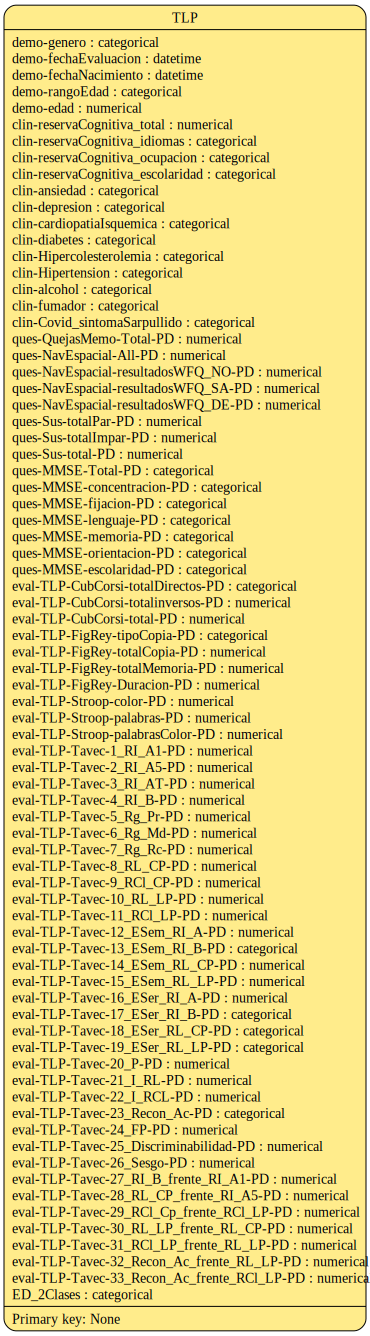

In [15]:
print('Auto detected data:\n')
metadata.visualize()

In [16]:
metadata.validate_table(data=df, table_name='TLP')

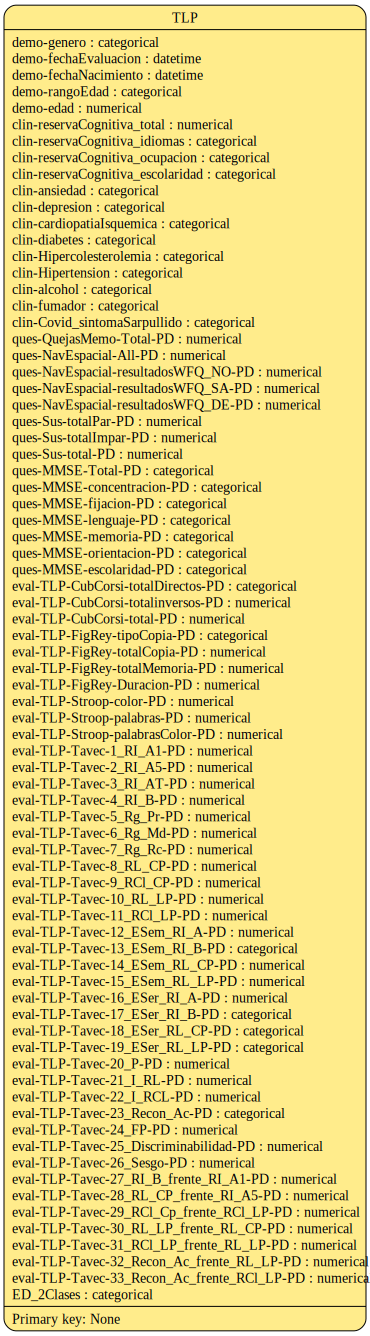

In [17]:
metadata.visualize()

In [18]:
import os
if os.path.exists("metadata.json"):
  os.remove("metadata.json")

metadata.save_to_json('metadata.json')

### 4. Synthesizers

Constrains

In [19]:
num_d, num_h = df['ED_2Clases'].value_counts()
num_synthetic_data = num_d - num_h

In [20]:
df['ED_2Clases'].value_counts()

ED_2Clases
D    248
H     66
Name: count, dtype: int64

In [21]:
from sdv.sampling import Condition

class_d = Condition(
    num_rows=3000,
    column_values={'ED_2Clases': 'D'}
)

class_h = Condition(
    num_rows=3000,
    column_values={'ED_2Clases': 'H'}
)

#### 4.1. GaussianCopulaSynthesizer

In [22]:
from sdv.single_table import GaussianCopulaSynthesizer

gc_synthesizer = GaussianCopulaSynthesizer(
    metadata,
    enforce_min_max_values=True,
    enforce_rounding=True,
    locales=["es_ES"],
    numerical_distributions={},
    default_distribution='beta'
)

In [23]:
gc_synthesizer.auto_assign_transformers(df)

In [24]:
processed_df = gc_synthesizer.preprocess(df)

In [25]:
gc_synthesizer.fit_processed_data(processed_df)

In [26]:
synthetic_data_list = []

while len(synthetic_data_list) < num_synthetic_data:
    samples = gc_synthesizer.sample(num_rows=NUM_ROWS)
    synthetic_data_list.extend(samples.loc[samples['ED_2Clases'] == 'H'].values.tolist()[:num_synthetic_data - len(synthetic_data_list)])

In [27]:
synthetic_data_df = pd.DataFrame(synthetic_data_list, columns=df.columns)

In [30]:
gc_synthetic_data_oversampling = gc_synthesizer.sample_from_conditions(
    conditions=[class_d, class_h],
    batch_size = 50,
    max_tries_per_batch = 100
)

Sampling conditions: 100%|██████████| 6000/6000 [00:36<00:00, 162.25it/s]


In [31]:
gc_synthetic_data = pd.concat([df, synthetic_data_df, gc_synthetic_data_oversampling], ignore_index=True)

In [32]:
gc_synthetic_data.shape

(6496, 77)

In [33]:
gc_synthetic_data.to_csv(
    '../../../data/tlp/synthetic-oversampling-gc.csv',
    index=False
)

#### 4.2.CTGANSynthesizer

In [34]:
from sdv.single_table import CTGANSynthesizer

ctgan_synthesizer = CTGANSynthesizer(
    metadata,
    enforce_min_max_values=True,
    enforce_rounding=True,
    locales=['es_ES'],
    epochs=NUM_EPOCHS,
    verbose=True,
    cuda=True
)

In [35]:
ctgan_synthesizer.auto_assign_transformers(df)

In [36]:
processed_df = ctgan_synthesizer.preprocess(df)

In [37]:
ctgan_synthesizer.fit_processed_data(processed_df)

Gen. (-1.46) | Discrim. (-0.67): 100%|██████████| 10000/10000 [20:29<00:00,  8.13it/s]


In [38]:
synthetic_data_list = []

while len(synthetic_data_list) < num_synthetic_data:
    samples = ctgan_synthesizer.sample(num_rows=NUM_ROWS)
    synthetic_data_list.extend(samples.loc[samples['ED_2Clases'] == 'H'].values.tolist()[:num_synthetic_data - len(synthetic_data_list)])


In [39]:
synthetic_data_df = pd.DataFrame(synthetic_data_list, columns=df.columns)

In [40]:
ctgan_synthetic_data_oversampling = ctgan_synthesizer.sample_from_conditions(
    conditions=[class_d, class_h],
    batch_size = 50,
    max_tries_per_batch = 100
)

Sampling conditions: 100%|██████████| 6000/6000 [01:47<00:00, 55.96it/s]


In [41]:
ctgan_synthetic_data = pd.concat([df, synthetic_data_df, ctgan_synthetic_data_oversampling], ignore_index=True)

In [42]:
ctgan_synthetic_data.shape

(6496, 77)

In [43]:
ctgan_synthetic_data.to_csv(
    '../../../data/tlp/synthetic-oversampling-ctgan.csv',
    index=False
)

#### 4.3. TVAESynthesizer

In [44]:
from sdv.single_table import TVAESynthesizer

tvaes_synthesizer = TVAESynthesizer(
    metadata,
    enforce_min_max_values=True,
    enforce_rounding=True,
    epochs=NUM_EPOCHS,
    verbose=True,
    cuda=True
)

In [45]:
tvaes_synthesizer.auto_assign_transformers(df)

In [46]:
processed_df = tvaes_synthesizer.preprocess(df)

In [47]:
tvaes_synthesizer.fit_processed_data(processed_df)

Loss: -178.370: 100%|██████████| 10000/10000 [07:13<00:00, 23.08it/s]


In [48]:
synthetic_data_list = []

while len(synthetic_data_list) < num_synthetic_data:
    samples = tvaes_synthesizer.sample(num_rows=NUM_ROWS)
    synthetic_data_list.extend(samples.loc[samples['ED_2Clases'] == 'H'].values.tolist()[:num_synthetic_data - len(synthetic_data_list)])

In [49]:
synthetic_data_df = pd.DataFrame(synthetic_data_list, columns=df.columns)

In [50]:
tvaes_synthetic_data_oversampling = tvaes_synthesizer.sample_from_conditions(
    conditions=[class_d, class_h],
    batch_size = 50,
    max_tries_per_batch = 100
)

Sampling conditions: 100%|██████████| 6000/6000 [01:54<00:00, 52.38it/s]


In [51]:
tvaes_synthetic_data = pd.concat([df, synthetic_data_df, tvaes_synthetic_data_oversampling], ignore_index=True)

In [52]:
tvaes_synthetic_data.shape

(6496, 77)

In [53]:
tvaes_synthetic_data.to_csv(
    '../../../data/tlp/synthetic-oversampling-tvaes.csv',
    index=False
)

### 5. Evaluating Real vs. Synthetic Data

In [54]:
from sdv.evaluation.single_table import get_column_plot

plot_columns = list(df.columns)

#### 5.1. GaussianCopulaSynthesizer

In [55]:
from sdv.evaluation.single_table import run_diagnostic

gc_diagnostic = run_diagnostic(
    real_data=df,
    synthetic_data=gc_synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 77/77 [00:00<00:00, 1820.51it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 97.82it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [56]:
from sdv.evaluation.single_table import evaluate_quality

gc_quality_report = evaluate_quality(
    df,
    gc_synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 77/77 [00:00<00:00, 256.66it/s]|
Column Shapes Score: 84.45%

(2/2) Evaluating Column Pair Trends: |██████████| 2926/2926 [00:11<00:00, 264.00it/s]|
Column Pair Trends Score: 85.59%

Overall Score (Average): 85.02%



In [57]:
# gc_details = gc_quality_report.get_details('Column Pair Trends')
# gc_details[gc_details['Real Correlation'].notnull()]

In [58]:
#gc_quality_report.get_details('Column Shapes')

In [59]:
# for column in plot_columns:
#     fig = get_column_plot(
#         real_data=df,
#         synthetic_data=gc_synthetic_data,
#         column_name=column,
#         metadata=metadata
#     )
#     fig.show()

#### 5.2. CTGANSynthesizer

In [60]:
ctgan_diagnostic = run_diagnostic(
    real_data=df,
    synthetic_data=ctgan_synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 77/77 [00:00<00:00, 1675.23it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 254.20it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [61]:
ctgan_quality_report = evaluate_quality(
    df,
    ctgan_synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 77/77 [00:00<00:00, 232.35it/s]|
Column Shapes Score: 80.39%

(2/2) Evaluating Column Pair Trends: |██████████| 2926/2926 [00:11<00:00, 265.20it/s]|
Column Pair Trends Score: 84.38%

Overall Score (Average): 82.39%



In [62]:
# ctgan_details = ctgan_quality_report.get_details('Column Pair Trends')
# ctgan_details[ctgan_details['Real Correlation'].notnull()]

In [63]:
# ctgan_quality_report.get_details('Column Shapes')

In [64]:
#for column in plot_columns:
#    fig = get_column_plot(
#        real_data=df,
#        synthetic_data=ctgan_synthetic_data,
#        column_name=column,
#        metadata=metadata
#    )
#    fig.show()

#### 5.3. TVAESSynthesizer

In [65]:
tvaes_diagnostic = run_diagnostic(
    real_data=df,
    synthetic_data=tvaes_synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 77/77 [00:00<00:00, 1635.96it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 724.78it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [66]:
tvaes_quality_report = evaluate_quality(
    df,
    tvaes_synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 77/77 [00:00<00:00, 386.05it/s]|
Column Shapes Score: 90.61%

(2/2) Evaluating Column Pair Trends: |██████████| 2926/2926 [00:10<00:00, 267.25it/s]|
Column Pair Trends Score: 90.41%

Overall Score (Average): 90.51%



In [67]:
# tvaes_details = tvaes_quality_report.get_details('Column Pair Trends')
# tvaes_details[tvaes_details['Real Correlation'].notnull()]

In [68]:
# tvaes_quality_report.get_details('Column Shapes')

In [69]:
#for column in plot_columns:
#    fig = get_column_plot(
#        real_data=df,
#        synthetic_data=tvaes_synthetic_data,
#        column_name=column,
#        metadata=metadata
#    )
#    fig.show()